# 歌单搜索

In [ ]:
import requests
import random
from faker import Factory
from bs4 import BeautifulSoup
import json
import re
import time
import os

user_list=[];

def proxypool(num):  
    n = 1  
    #os.chdir(r'/Users/apple888/PycharmProjects/proxy IP')  
    fp = open('D:/host.txt', 'r')  
    proxys = list()  
    ips = fp.readlines()  
    while n<num:  
        for p in ips:  
            ip = p.strip('\n').split('\t')  
            proxy = 'https://' + ip[0] + ':' + ip[1]  
            proxies = {'http': proxy}  
            #print(proxies)  
            proxys.append(proxies)  
            n+=1  
    return proxys

def mkdir(path):
    path = path.strip() # 去除首位空格
    path = path.rstrip("\\")# 去除尾部 \ 符号
    isExists = os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False
    
def gen_user():
    f = Factory.create()
    for i in range(1,10):
        user_list.append(f.user_agent())
gen_user()
headers = {
    'Host':'music.163.com',
    'Referer':'http://music.163.com/',
    'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'Accept-Encoding':'gzip, deflate',
    #'Cookie':'_ntes_nnid=6ad965d3bba9225669a6d6029c73d79c,1504263116276; _ntes_nuid=6ad965d3bba9225669a6d6029c73d79c; __s_=1; __gads=ID=c7c3eaa70ca30dd7:T=1504270841:S=ALNI_Mb_t8DV0VFdTPHeDDywzjutyrvZAA; vjuids=-3fcbb1cf1.15e3d878994.0.e3b3830fe104f; usertrack=c+xxC1mss7VqEUMjGhkrAg==; mail_psc_fingerprint=f32f51f1dc9bd996393e21c1349ce347; _ngd_tid=%2Fpw1pCNYXUK7O20qSbNJ0qsoBjaSqyCp; _ga=GA1.2.403346206.1504525357; Qs_lvt_73318=1510133325%2C1510296977; Qs_pv_73318=4396880818425186300%2C2012772792392639500; vjlast=1504270846.1510466253.21; vinfo_n_f_l_n3=51eb0486533a2546.1.4.1504270846685.1510466293579.1510627518574; NTES_SESS=..EtSnk1Ob4WqqlBXPPSPwk2MVJEDZPEd7kVLIxZBs53mVb8mPEkn1acmp3s87nuGD.zRZ1iVPVwXTSHuMjtmQSlpLV19F3sT7WTnqAyMriR7akFR39m8f7zQvtc8T4YQjLTgS2u3dfyTwT3EaIwCT1G0__dIL79vonQ1YomNV3Kt; NTES_PASSPORT=UJ_fdhPamXJzmtf9lzEBsdbdvALKOXvdcOc19qQ3MSedVQXFV_orx57eVviHFLxWTyQ4PZRbgCH0LOiGW08dt_9ZFCLtHwExmkFbq_RLUr2KEVO.Rk7k.EqSr; S_INFO=1510892245|0|3&80##|arthur_0215; P_INFO=arthur_0215@163.com|1510892245|1|study|00&99|shh&1510892241&study#shh&null#10#0#0|&0|mail163&study|arthur_0215@163.com; JSESSIONID-WYYY=2YmEFWpf4TuUFbcmgIJ1NK84TBscrXo%2F2xhECbCDHft%5CAcxenh7n1Rvl0wKEBi%2FpBzlpCH1PzCEu2TQoSasC5rX1jbV%2Ft0mF28SONtWjUSG%5CoBJ03mMqEoABZi3CwNuXt2JbaUQ06CF1TaMBv90OrRoPpOlNWRNM2yFZRr6N9MHo%5CTWS%3A1510899163067; _iuqxldmzr_=32; MUSIC_U=9de0b492647e4661b8f8664492eed97e9ee1823341379f91509577811f579f25e923614a2e7fccb1a39b6099dc9f72313a49933cd61612eaddffce3a425e6bd9af9e62a8590fd08a; __remember_me=true; __csrf=8372d74bfaf15ca0b50a2ad5f30fcbc1; __utma=94650624.403346206.1504525357.1510886417.1510892140.6; __utmb=94650624.37.10.1510892140; __utmc=94650624; __utmz=94650624.1510846422.3.2.utmcsr=baidu|utmccn=(organic)|utmcmd=organic',
    'User-Agent': random.choice(user_list)
}
def get_playid(list_ID):
    url = 'http://music.163.com/playlist?id=' + str(list_ID)
    #r = requests.get(url).text
    #print(r)
    #proxypool(150)
    proxies=random.choice(proxypool(150))
          #  print (proxies)
          #  rep = requests.get(url,headers=headers,proxies=proxies)
    r = requests.get(url,headers=headers).text
   # print(r)
    soup=BeautifulSoup(r,'html.parser')
    t = soup.find('ul',class_='f-hide')
    #x=soup.find('script')
    #x.lstrip('{')
    t=t.find_all('a')
    ids ={}

    for music in t:
        ids[music.text]=music['href'].lstrip('/song?id=')
        #print (music.text)
        #print (music['href'])
    return ids
#get_playid(468331407)

def get_lyric_by_music_id(music_id):#通过音乐的id得到歌词
    time.sleep(2) 
    lrc_url = 'http://music.163.com/api/song/lyric?' + 'id=' + str(music_id) + '&lv=1&kv=1&tv=-1'
    lyric = requests.get(lrc_url)
     
    json_obj = lyric.text
    #print(json_obj)
    j = json.loads(json_obj)
    #print(type(j))#打印出来j的类型是字典
    try:#部分歌曲没有歌词，这里引入一个异常
        lrc = j['lrc']['lyric']
        pat = re.compile(r'\[.*\]')#下面这三行正则匹配删除时间轴
        lrc = re.sub(pat,"",lrc)
        lrc = lrc.strip()
        return lrc
    except KeyError as e:
        pass

ID=779407493
music_id_set = get_playid(ID)
#print(music_id_set)
#singer_name = singer_name_all.split(' -')[0]
#print(singer_name)
mkpath = '.\\' + str(ID) + '\\'
mkdir(mkpath)
for key in music_id_set:
    lrc_content = get_lyric_by_music_id(music_id_set[key])
    # print(lrc_content)
    # print(key)#歌名
    #print(singer_name)
    key=key.strip('?')
    if '/' in key:
        key=key.replace('/',' ')
        
    f = open(mkpath + key +'.txt', 'w',encoding='utf-8')
    try:  # 引入异常
        #print(type(lrc_content.encode('utf-8')))
        if lrc_content is not None:
            f.write(lrc_content)
        f.close()
    except AttributeError as e2:
        pass


# s=soup.find('ul' ,class_='f_hide' )
# for music in s.find_all('a'):
#     print('{}:()'.format(music.text,music['href']))
    




In [74]:
key='dfdfdgJdfgdgergye'
key=key.replace('J','_')
#key[no]='_'
key

'dfdfdg_dfgdgergye'

In [1]:

def get_lyric_by_music_id(music_id):#通过音乐的id得到歌词
    lrc_url = 'http://music.163.com/api/song/lyric?' + 'id=' + str(music_id) + '&lv=1&kv=1&tv=-1'
    lyric = requests.get(lrc_url)
    json_obj = lyric.text
    #print(json_obj)
    j = json.loads(json_obj)
    #print(type(j))#打印出来j的类型是字典
    try:#部分歌曲没有歌词，这里引入一个异常
        lrc = j['lrc']['lyric']
        pat = re.compile(r'\[.*\]')#下面这三行正则匹配删除时间轴
        lrc = re.sub(pat,"",lrc)
        lrc = lrc.strip()
        return lrc
    except KeyError as e:
        pass


(music_id_set,singer_name_all) = get_music_ids_by_singer_id(4479)
print(music_id_set)
singer_name = singer_name_all.split(' -')[0]
#print(singer_name)
mkpath = '.\\' + singer_name + '\\'
mkdir(mkpath)
for key in music_id_set:
    lrc_content = get_lyric_by_music_id(music_id_set[key])
    # print(lrc_content)
    # print(key)#歌名
    #print(singer_name)
    key=key.strip('?')
    f = open(mkpath + key +'.txt', 'w',encoding='utf-8')
    try:  # 引入异常
        #print(type(lrc_content.encode('utf-8')))
        if lrc_content is not None:
            f.write(lrc_content)
        f.close()
    except AttributeError as e2:
        pass


# s=soup.find('ul' ,class_='f_hide' )
# for music in s.find_all('a'):
#     print('{}:()'.format(music.text,music['href']))
    
    

NameError: name 'get_music_ids_by_singer_id' is not defined

# 词云分析

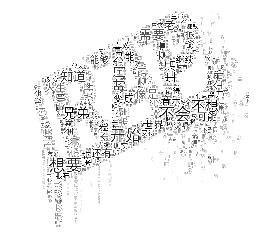

In [8]:
import jieba.analyse
import os
from os import path
import jieba
import matplotlib.pyplot as plt
from scipy.misc import imread
from wordcloud import WordCloud,ImageColorGenerator

d = 'D:\\'

all_words = []
ipath = 'HP'
lyrics= ''

stopwords = [line.strip() for line in open('D:\\stopword_jj.txt').readlines()]
for filename in os.listdir(ipath):
    #print (filename)
    with open(ipath + '\\' + filename,'rb') as f:
        lyrics += f.read().decode('utf-8')
# print (lyrics)
result = jieba.analyse.textrank(lyrics,topK = 1000,withWeight = True)
keywords = dict()
for i in result:
    if i[0] not in stopwords:#去停用词
        keywords[i[0]] = i[1]
    # print (i[0])
#print(keywords)


# backgroud_Image = plt.imread('timg3.jpg')
backgroud_Image = imread(path.join(d, "D:\\rap.jpg"))
wc = WordCloud(
                background_color = 'white',    # 设置背景颜色
                mask = backgroud_Image,        # 设置背景图片
                max_words = 8000,            # 设置最大显示的字数
                font_path = 'D:/Deng.ttf',# 设置字体格式，如不设置显示不了中文
                max_font_size = 50,            # 设置字体最大值
                random_state = 100,            # 设置有多少种随机生成状态，即有多少种配色方案

                )
wc.generate_from_frequencies(keywords)
image_colors = ImageColorGenerator(backgroud_Image)
wc.recolor(color_func = image_colors)
plt.imshow(wc)
plt.axis('off')
plt.show()
# 保存图片
d = 'D:\\'
wc.to_file(path.join(d, "词云图_total_rap.png"))
# wc = WordCloud(font_path='C:/Users/Windows/fonts/msyh.ttf',background_color='White',max_words=50,mask=graph)
# wc.generate_from_frequencies(keywords)
# image_color = ImageColorGenerator(graph)
# plt.imshow(wc)
# plt.imshow(wc.recolor(color_func=image_color))
# plt.axis("off")
# plt.show()

In [27]:
# -*- coding:utf-8 -*-

import requests
from bs4 import BeautifulSoup
import json
import re
import os


def mkdir(path):
    path = path.strip() # 去除首位空格
    path = path.rstrip("\\")# 去除尾部 \ 符号
    isExists = os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False


def get_music_ids_by_singer_id():#获取这个歌手的歌曲的id
    singer_ID=468331407
    url = 'http://music.163.com/playlist?id=' + str(singer_ID)
    r = requests.get(url).text
    print(r)
    bs_obj = BeautifulSoup(r,'lxml')
    #singer_name = bs_obj.select("#artist-name")
    #singer_name = singer_name[0].get('title')
    t = bs_obj.find('textarea')
   # try:
        #r=re.search(r'"id":\d+;',t.text);
        #print (r)
        
        #musics = json.loads(t.text.replace('(','[').replace(')',']').replace('\'','"'))
    
        #musics = json.loads(t.text)
    print (t.text)
#         ids ={}
#         for music in musics:
#             ids[music['name']] = music['id']
#             print (music['id'])
        #return ids,singer_name
#     except StopIteration as err:
#         pass

# def get_lyric_by_music_id(music_id):#通过音乐的id得到歌词
#     lrc_url = 'http://music.163.com/api/song/lyric?' + 'id=' + str(music_id) + '&lv=1&kv=1&tv=-1'
#     lyric = requests.get(lrc_url)
#     json_obj = lyric.text
#     #print(json_obj)
#     j = json.loads(json_obj)
#     #print(type(j))#打印出来j的类型是字典
#     try:#部分歌曲没有歌词，这里引入一个异常
#         lrc = j['lrc']['lyric']
#         pat = re.compile(r'\[.*\]')#下面这三行正则匹配删除时间轴
#         lrc = re.sub(pat,"",lrc)
#         lrc = lrc.strip()
#         return lrc
#     except KeyError as e:
#         pass


#(music_id_set,singer_name_all) = get_music_ids_by_singer_id(468331407)
get_music_ids_by_singer_id()
#print(music_id_set)
# singer_name = singer_name_all.split(' -')[0]
# #print(singer_name)
# mkpath = '.\\' + singer_name + '\\'
# mkdir(mkpath)
# for key in music_id_set:
#     lrc_content = get_lyric_by_music_id(music_id_set[key])
#     # print(lrc_content)
#     # print(key)#歌名
#     #print(singer_name)
#     key=key.strip('?')
#     f = open(mkpath + key +'.txt', 'w',encoding='utf-8')
#     try:  # 引入异常
#         #print(type(lrc_content.encode('utf-8')))
#         if lrc_content is not None:
#             f.write(lrc_content)
#         f.close()
#     except AttributeError as e2:
#         pass








<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8">
<meta name="baidu-site-verification" content="cNhJHKEzsD" />
<meta property="qc:admins" content="27354635321361636375" />
<link rel="canonical" href="https://music.163.com/playlist?id=468331407">
<meta name="applicable-device" content="pc">
<link rel="alternate" media="only screen and (max-width: 640px)" href="https://music.163.com/m/playlist?id=468331407">
<meta name="mobile-agent" content="format=html5;url=https://music.163.com/m/playlist?id=468331407">
<title>Higher Brothers [海尔兄弟] - 歌单 - 网易云音乐</title>
<meta name="keywords" content="Higher Brothers [海尔兄弟]，4pkk，华语，说唱" />
<meta name="description" content="歌单：Higher Brothers [海尔兄弟]。创建者：4pkk。标签：华语、说唱。" />
<script type="application/ld+json">
{
"@context": "https://ziyuan.baidu.com/contexts/cambrian.jsonld",
"@id": "http://music.163.com/playlist?id=468331407",
"appid": "1582028769404989",
"title": "Higher Brothers [海尔兄弟]",
"images": ["http://p1.music.126.net/7bRVnN5hAc2U5zdj6A3k2A==/190

# 歌手搜索

In [26]:
# -*- coding:utf-8 -*-

import requests
from bs4 import BeautifulSoup
import json
import re
import os


def mkdir(path):
    path = path.strip() # 去除首位空格
    path = path.rstrip("\\")# 去除尾部 \ 符号
    isExists = os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False


def get_music_ids_by_singer_id(singer_ID):#获取这个歌手的歌曲的id
    url = 'http://music.163.com/artist?id=' + str(singer_ID)
    r = requests.get(url).text
    print(r)
    bs_obj = BeautifulSoup(r,'lxml')
    singer_name = bs_obj.select("#artist-name")
    singer_name = singer_name[0].get('title')
    t = bs_obj.find('textarea')
    try:
        #r=re.search(r'"id":\d+;',t.text);
        #print (r)
        
        #musics = json.loads(t.text.replace('(','[').replace(')',']').replace('\'','"'))
    
        musics = json.loads(t.text)
        ids ={}
        for music in musics:
            ids[music['name']] = music['id']
            print (music['id'])
        return ids,singer_name
    except StopIteration as err:
        pass

def get_lyric_by_music_id(music_id):#通过音乐的id得到歌词
    lrc_url = 'http://music.163.com/api/song/lyric?' + 'id=' + str(music_id) + '&lv=1&kv=1&tv=-1'
    lyric = requests.get(lrc_url)
    json_obj = lyric.text
    #print(json_obj)
    j = json.loads(json_obj)
    #print(type(j))#打印出来j的类型是字典
    try:#部分歌曲没有歌词，这里引入一个异常
        lrc = j['lrc']['lyric']
        pat = re.compile(r'\[.*\]')#下面这三行正则匹配删除时间轴
        lrc = re.sub(pat,"",lrc)
        lrc = lrc.strip()
        return lrc
    except KeyError as e:
        pass


(music_id_set,singer_name_all) = get_music_ids_by_singer_id(4479)
print(music_id_set)
singer_name = singer_name_all.split(' -')[0]
#print(singer_name)
mkpath = '.\\' + singer_name + '\\'
mkdir(mkpath)
for key in music_id_set:
    lrc_content = get_lyric_by_music_id(music_id_set[key])
    # print(lrc_content)
    # print(key)#歌名
    #print(singer_name)
    key=key.strip('?')
    f = open(mkpath + key +'.txt', 'w',encoding='utf-8')
    try:  # 引入异常
        #print(type(lrc_content.encode('utf-8')))
        if lrc_content is not None:
            f.write(lrc_content)
        f.close()
    except AttributeError as e2:
        pass








<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8">
<meta name="baidu-site-verification" content="cNhJHKEzsD" />
<meta property="qc:admins" content="27354635321361636375" />
<link rel="canonical" href="https://music.163.com/artist?id=4479">
<meta name="applicable-device" content="pc">
<link rel="alternate" media="only screen and (max-width: 640px)" href="https://music.163.com/m/artist?id=4479">
<meta name="mobile-agent" content="format=html5;url=https://music.163.com/m/artist?id=4479">
<title>MC Hotdog（热狗，姚中仁，哈狗帮） - 歌手 - 网易云音乐</title>
<meta name="keywords" content="MC Hotdog，热狗，姚中仁，哈狗帮" />
<meta name="description" content="MC HotDog本名姚中仁，生于台湾台北，台湾饶舌歌手，毕业于台北市立建国中学补校、天主教辅仁大学大众传播学系。他的歌曲大多使用通俗直白的语言对社会上的各种现象进行赤裸裸的揭露，其中的许多粗口、脏话和涉及到性词汇并对许多明星或其他人的攻击，整体风格都显得十分另类。" />
<script type="application/ld+json">
{
"@context": "https://ziyuan.baidu.com/contexts/cambrian.jsonld",
"@id": "http://music.163.com/artist?id=4479",
"appid": "1582028769404989",
"title": "MC Hotdog（热狗，姚中仁，哈狗帮）",
"images": ["http:/